In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from umap import UMAP  
import warnings

warnings.filterwarnings("ignore")

def hierarchical_clustering(data, n_clusters=3):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_cluster.fit_predict(data)
    return cluster_labels

def spectral_clustering(data, n_clusters=3):
    spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10, assign_labels='discretize', random_state=42)
    cluster_labels = spectral_cluster.fit_predict(data)
    return cluster_labels

def visualize_clusters_2d(data, labels, title, feature_names):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', legend='full', alpha=0.7)
    plt.title(title)
    plt.xlabel(feature_names[0]) 
    plt.ylabel(feature_names[1])  
    plt.legend(title='Cluster')
    plt.show()

def plot_clusters_3d(data, labels, title, feature_names):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()
    
def plot_clusters_3d_combined(data, labels, title, feature_names):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for label in np.unique(labels):
        idx = labels == label
        ax.scatter(data[idx, 0], data[idx, 1], data[idx, 2], label=f'Cluster {label}')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.legend()
    plt.show()


dataf = 'ingredient_data.csv'
df = pd.read_csv(dataf).dropna()

sampled_data = df.sample(frac=0.1, random_state=42)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sampled_data.drop(columns='category'))

hierarchical_labels = hierarchical_clustering(scaled_data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
feature_names_pca_2d = sampled_data.drop(columns='category').columns.tolist()[:2]
spectral_labels = spectral_clustering(scaled_data)
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(sampled_data.drop(columns='category'))
feature_names_pca_3d = sampled_data.drop(columns='category').columns.tolist()[:4]
hierarchical_labels_3d_pca = hierarchical_clustering(pca_data_3d)
spectral_labels_3d_pca = spectral_clustering(pca_data_3d)
umap_3d = UMAP(n_components=3, n_neighbors=15, min_dist=0.1)
umap_data_3d = umap_3d.fit_transform(sampled_data.drop(columns='category'))
feature_names_umap_3d = sampled_data.drop(columns='category').columns.tolist()[:5]
hierarchical_labels_3d_umap = hierarchical_clustering(umap_data_3d)
spectral_labels_3d_umap = spectral_clustering(umap_data_3d)
umap_3d = UMAP(n_components=3, n_neighbors=15, min_dist=0.1)
umap_data_3d = umap_3d.fit_transform(sampled_data.drop(columns='category'))
feature_names_umap_3d = sampled_data.drop(columns='category').columns.tolist()
hierarchical_labels = hierarchical_clustering(umap_data_3d)
spectral_labels = spectral_clustering(umap_data_3d)

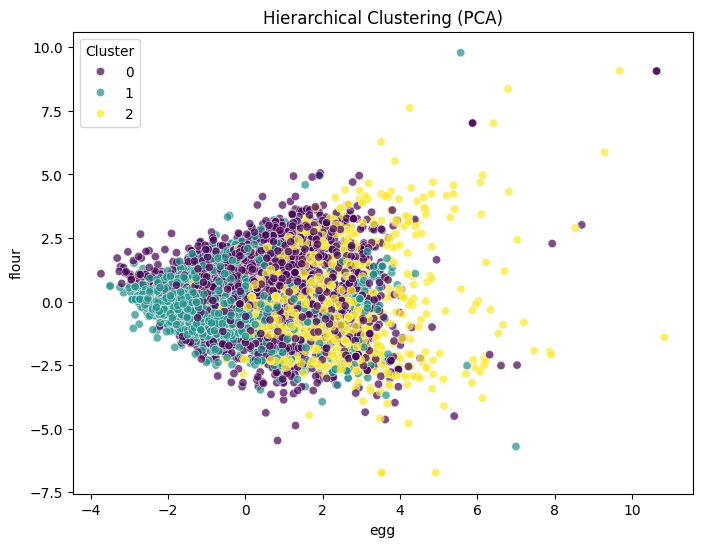

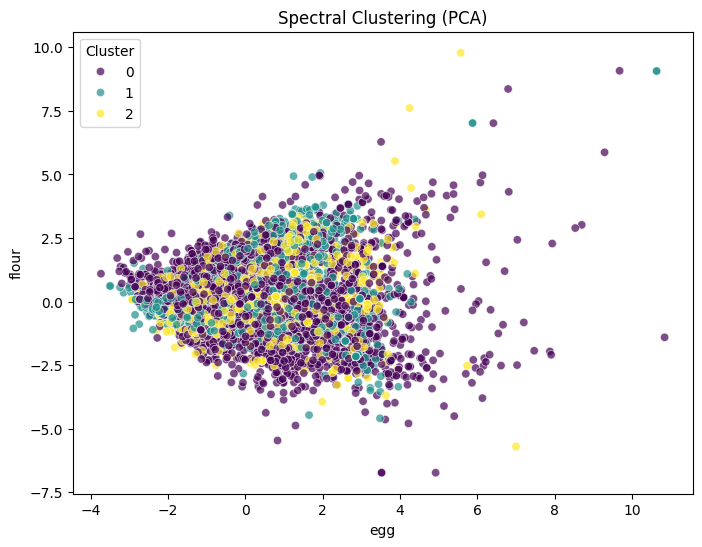

In [12]:
visualize_clusters_2d(pca_data, hierarchical_labels, 'Hierarchical Clustering (PCA)', feature_names_pca_2d)
visualize_clusters_2d(pca_data, spectral_labels, 'Spectral Clustering (PCA)', feature_names_pca_2d)


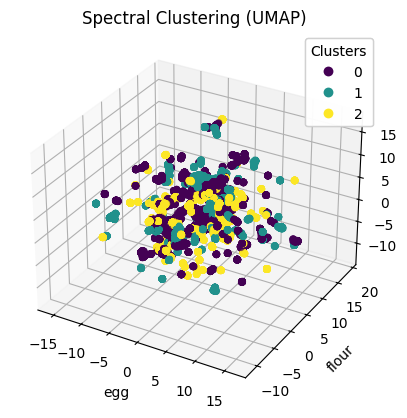

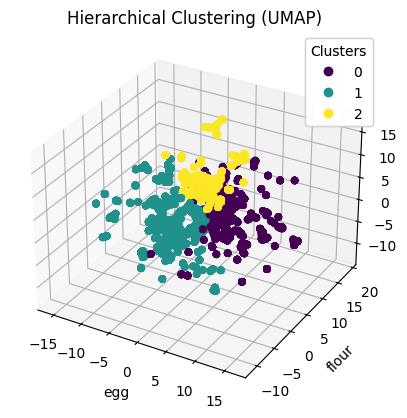

In [13]:
plot_clusters_3d(umap_data_3d, spectral_labels, 'Spectral Clustering (UMAP)', feature_names_umap_3d)
plot_clusters_3d(umap_data_3d, hierarchical_labels, 'Hierarchical Clustering (UMAP)', feature_names_umap_3d)

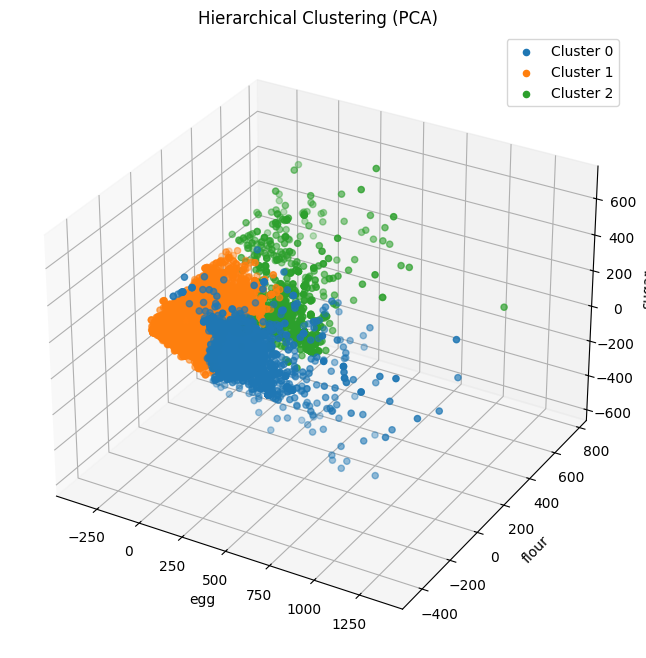

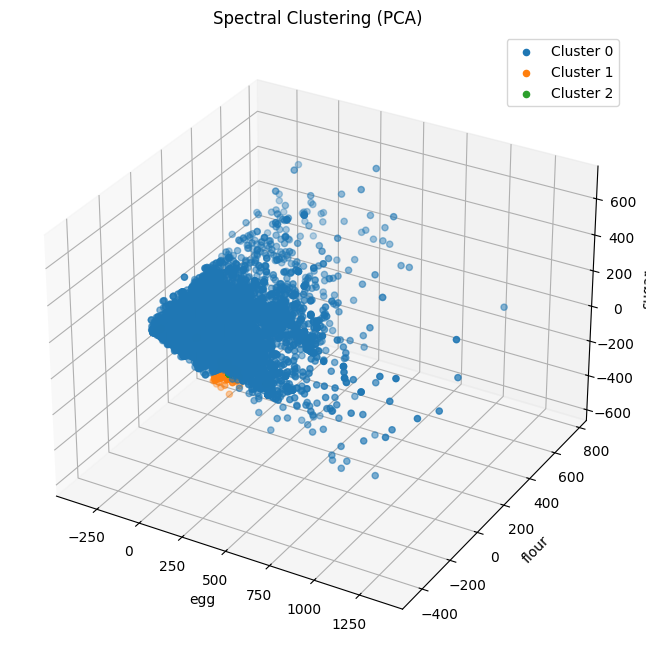

In [14]:
plot_clusters_3d_combined(pca_data_3d, hierarchical_labels_3d_pca, 'Hierarchical Clustering (PCA)', feature_names_pca_3d)
plot_clusters_3d_combined(pca_data_3d, spectral_labels_3d_pca, 'Spectral Clustering (PCA)', feature_names_pca_3d)


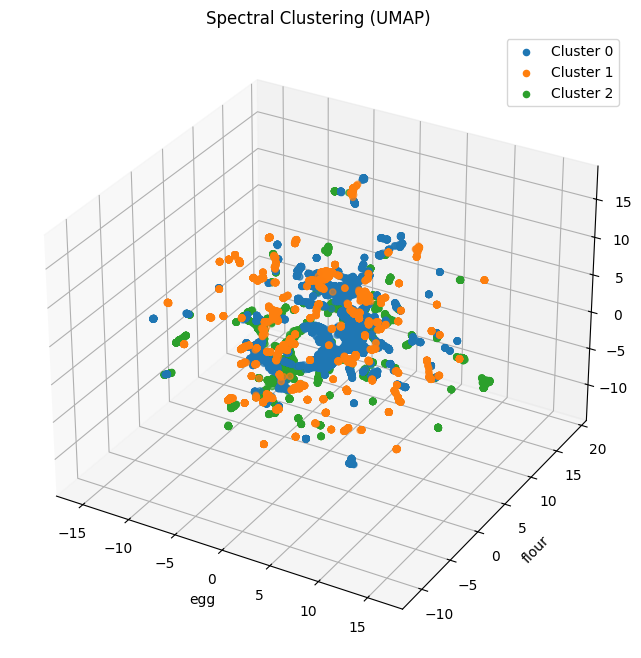

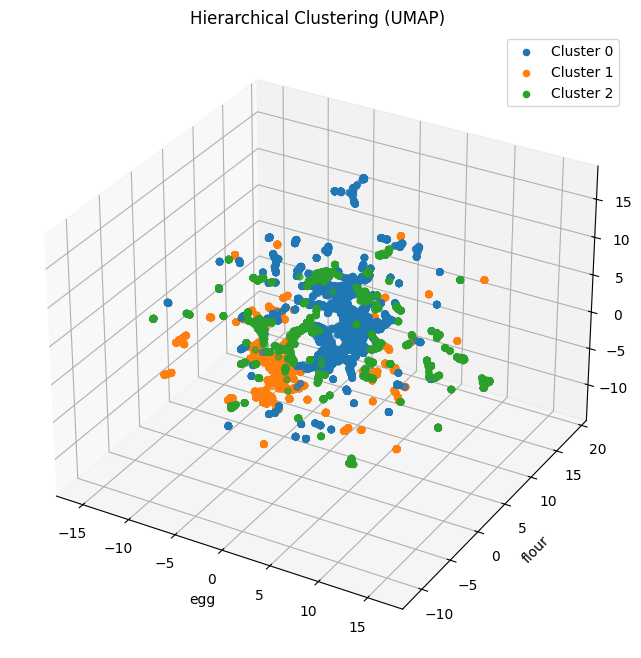

In [15]:
plot_clusters_3d_combined(umap_data_3d, spectral_labels_3d_umap, 'Spectral Clustering (UMAP)', feature_names_umap_3d)
plot_clusters_3d_combined(umap_data_3d, hierarchical_labels_3d_umap, 'Hierarchical Clustering (UMAP)', feature_names_umap_3d)

In [21]:
def prep(x):
    subsampled_data = sampled_data.sample(frac=0.2, random_state=42)  
    next_columns = subsampled_data.iloc[:, x:]  
    numeric_next_columns = next_columns.select_dtypes(include=['float64', 'int64'])
    next_scaled_data = scaler.fit_transform(numeric_next_columns)
    pca_next = PCA(n_components=2)  
    pca_data_next = pca_next.fit_transform(next_scaled_data)
    feature_names_pca_next = numeric_next_columns.columns.tolist()
    hierarchical_labels_next = hierarchical_clustering(pca_data_next)
    spectral_labels_next = spectral_clustering(pca_data_next)
    visualize_clusters_2d(pca_data_next, hierarchical_labels_next, 'Hierarchical Clustering', feature_names_pca_next)
    visualize_clusters_2d(pca_data_next, spectral_labels_next, 'Spectral Clustering', feature_names_pca_next)

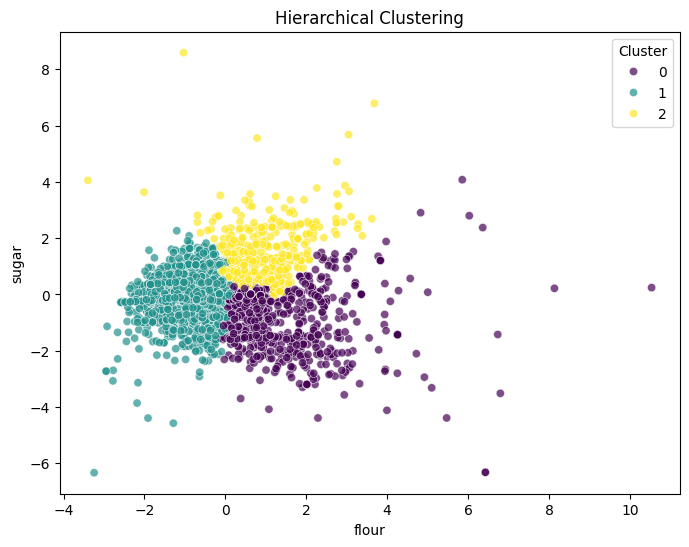

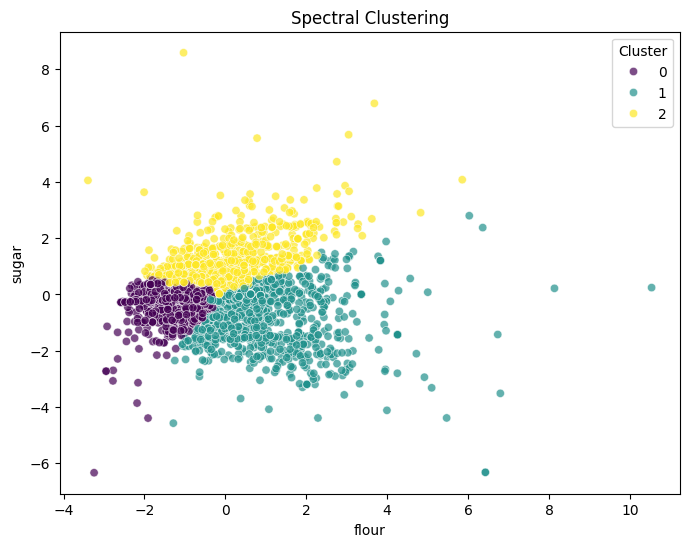

In [22]:
prep(1)

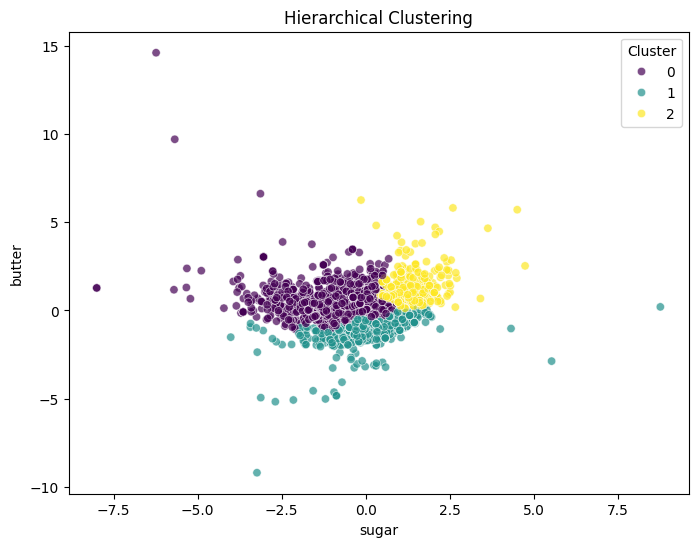

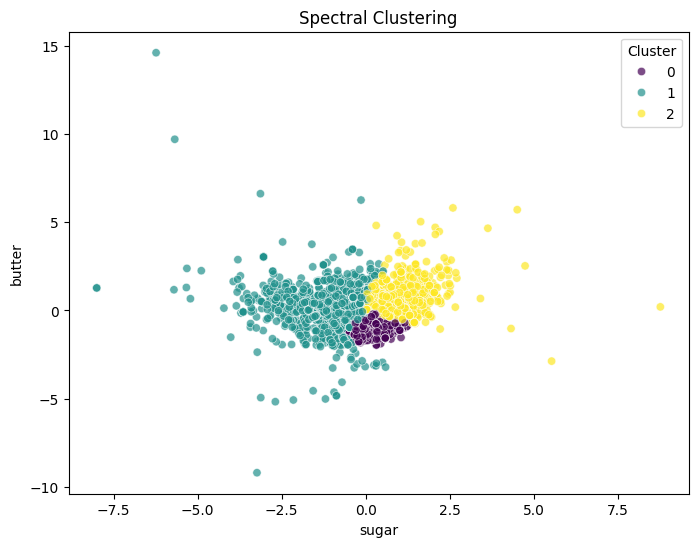

In [23]:
prep(2)

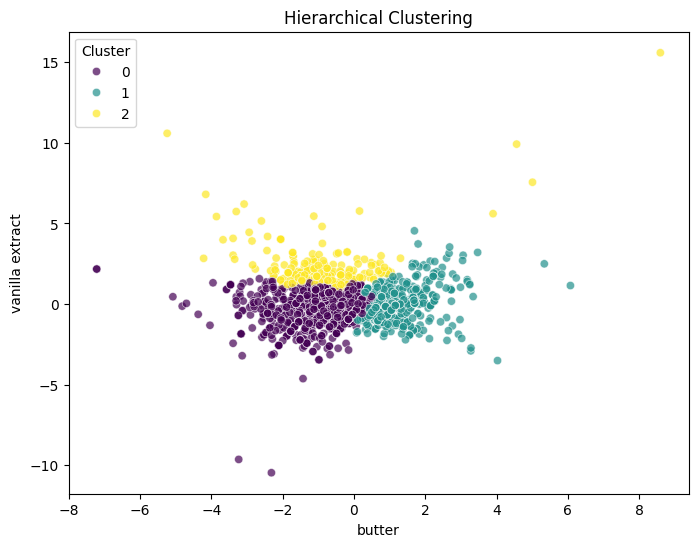

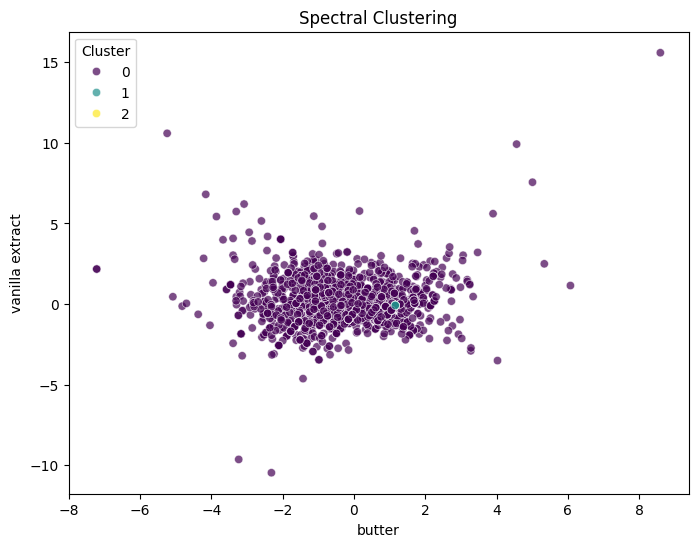

In [24]:
prep(3)

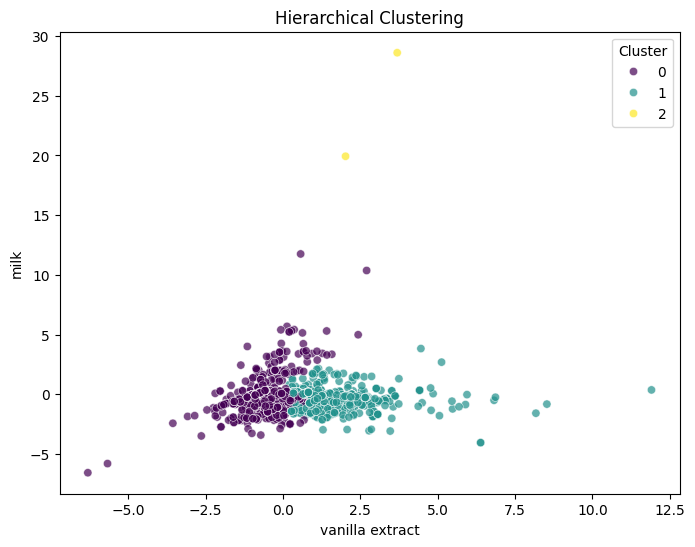

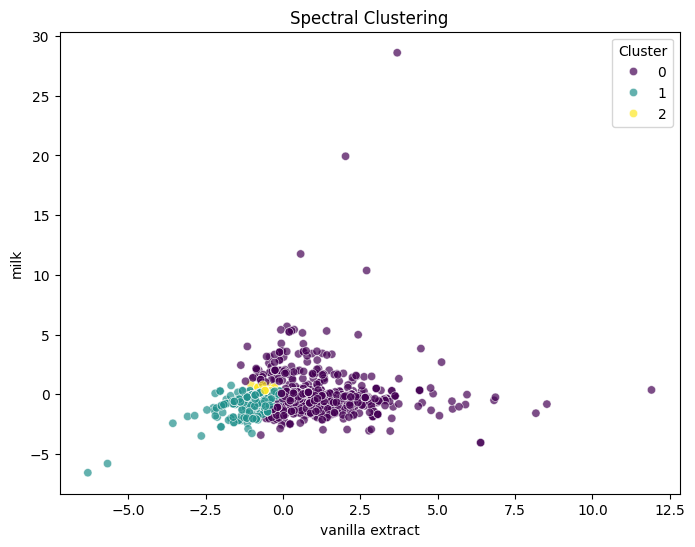

In [25]:
prep(4)

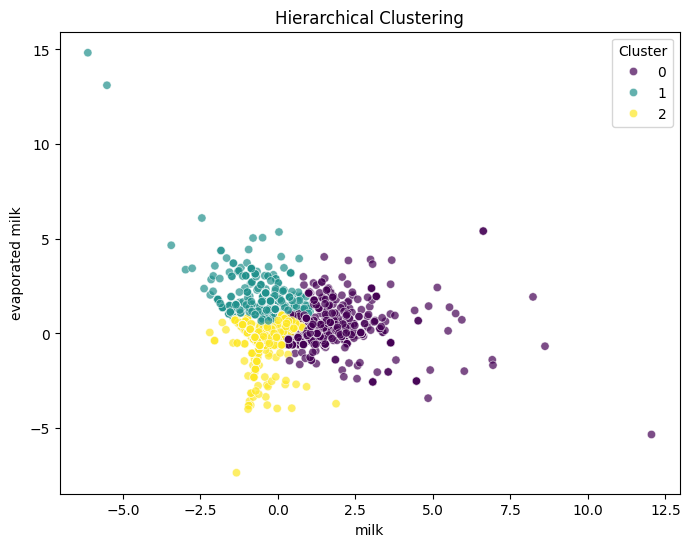

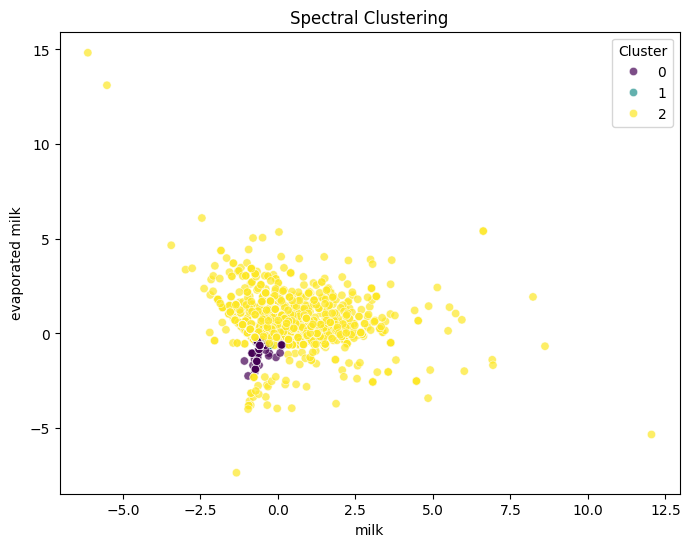

In [26]:
prep(5)

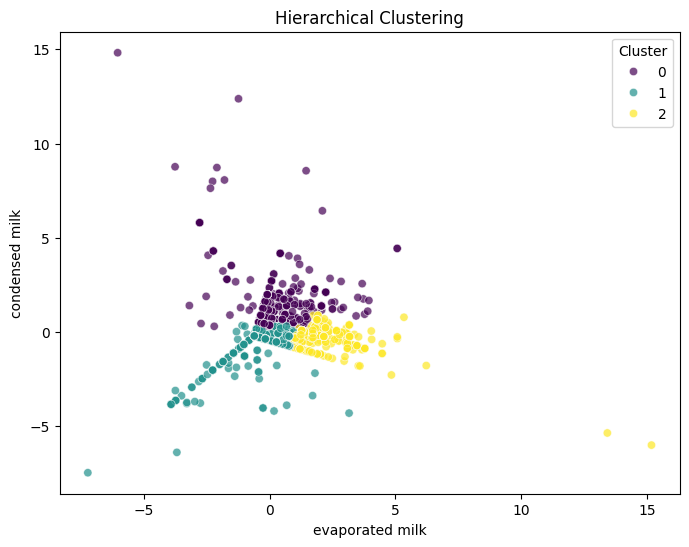

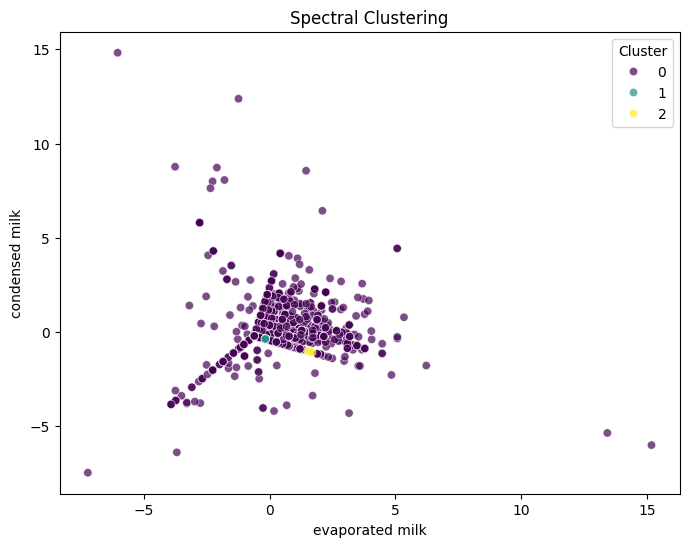

In [28]:
prep(6)

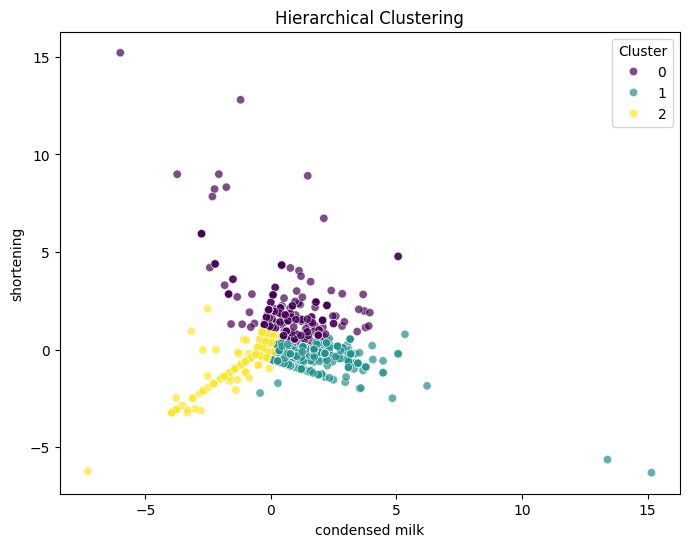

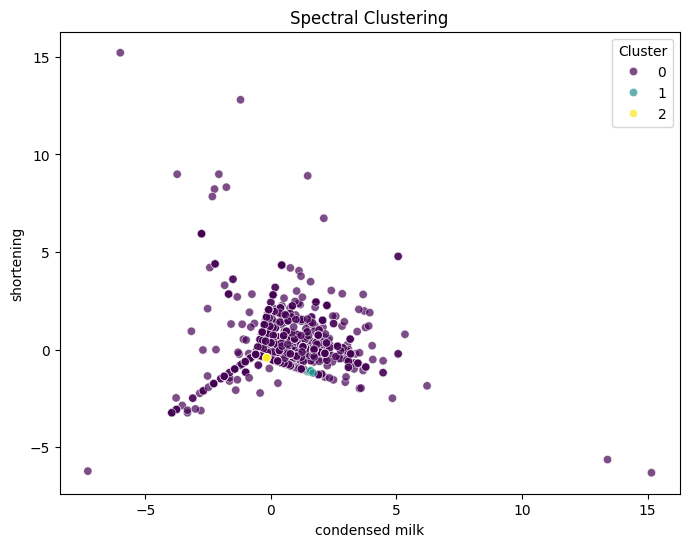

In [29]:
prep(7)

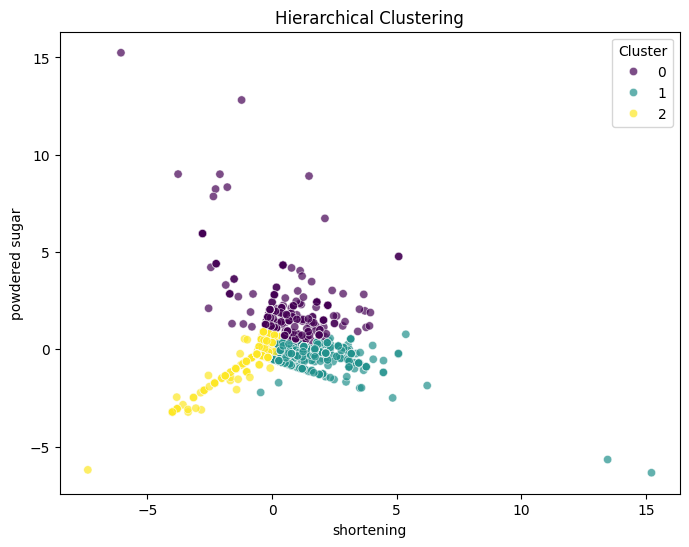

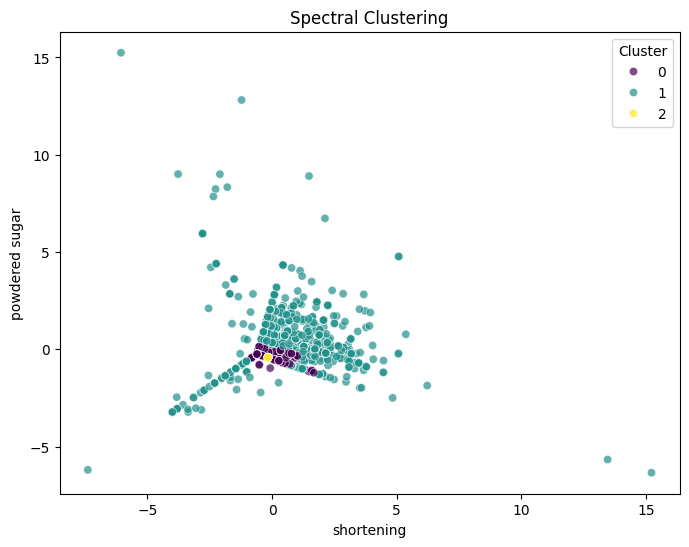

In [27]:
prep(8)

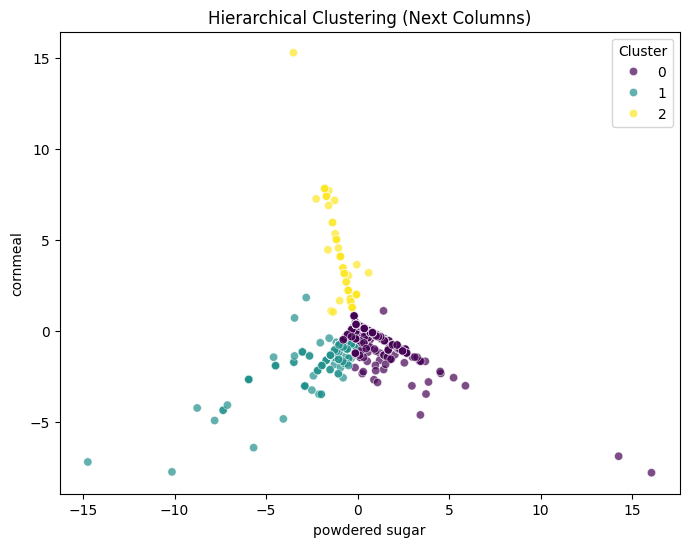

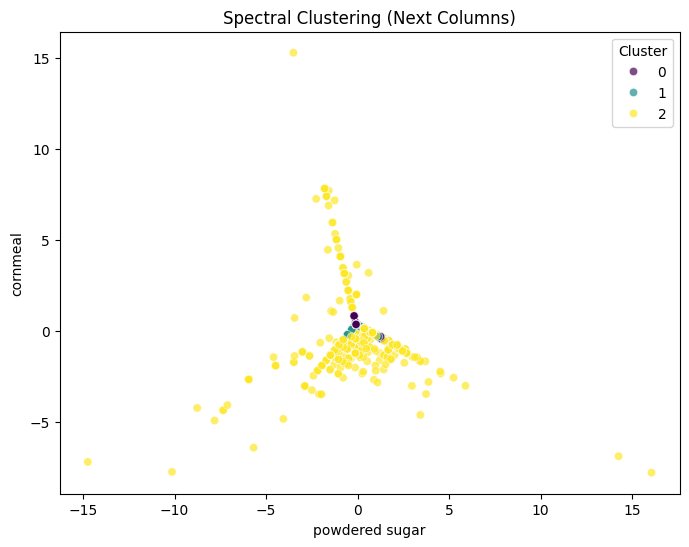

In [19]:
prep(9)

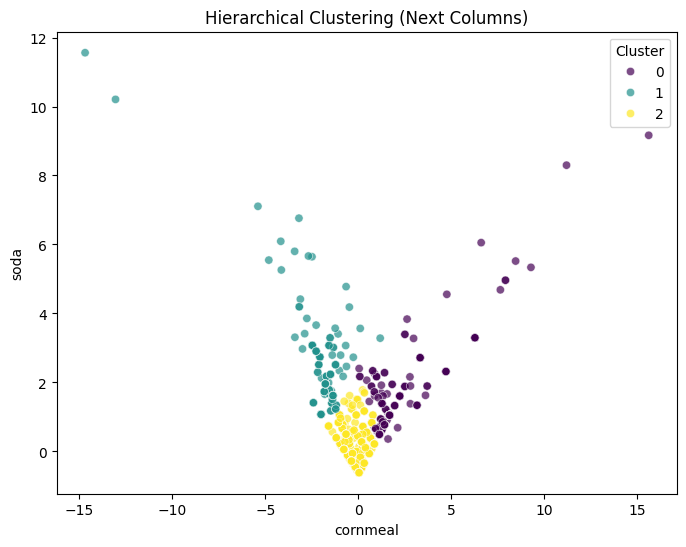

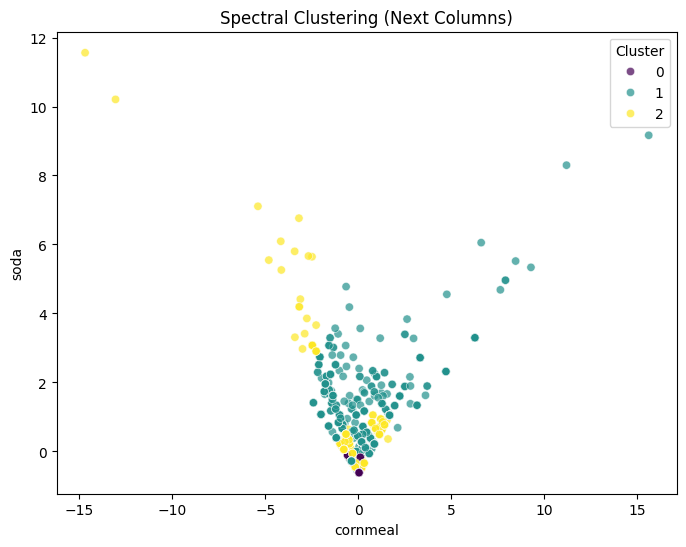

In [20]:
prep(10)